# **Análise Exploratória de Dados - BootCamp IGTI**

---







## **Objetivo: Análise exploratória dos dados (EDA - Exploratory Data Analysis) e comparação dos modelos de classificação.**

Para este desafio será utilizada uma versão modificada do dataset “Wine Quality” disponível no UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/wine).
Esse dataset contém um conjunto de atributos (dados de sensores) sobre o processo de fabricação de vinhos (tinto e branco). Esses dados são utilizados para classificar, ao final do processo, a qualidade do vinho obtido. Existem informações como o teor alcoólico e nível de acidez.

In [1]:
#importando as bibliotecas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importando os dados do google colab 
from google.colab import files 
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
#carregando as dados para o pandas 
df = pd. read_csv('winequality-red.csv', sep=';' )

## **Iniciando a análise exploratória**

---



Antes de iniciar o processo de análise, vamos conhecer as 5 primeiras entradas do dataframe 

In [4]:
#mostrando as características do dataframe 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df = df.rename(columns = {'fixed acidity':'acidez_fixa', 'volatile acidity':'acidez_volatil','citric acid':'acido_citrico', 'residual sugar':'acucar', 
                          'chlorides':'cloreto', 'free sulfur dioxide': 'dioxido_enxofre_livre',  'total sulfur dioxide':'dioxido_enxofre_total', 
                          'density':'densidade', 'ph': 'ph', 'sulphates': 'sulfato', 'alcohol': 'alcool', 'quality':'qualidade'                      
                          })

 **1) No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?**

In [6]:
print("Quantidade de Instâncias:\t {}".format(df.shape[0]))
print("Quantidade de Atributos:\t {}\n".format(df.shape[1]))

Quantidade de Instâncias:	 1599
Quantidade de Atributos:	 12



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar                 1599 non-null   float64
 4   cloreto                1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   pH                     1599 non-null   float64
 9   sulfato                1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**2) Quantos tipos diferentes de dados existem no dataset do desafio?**

In [8]:
df.dtypes.value_counts()

float64    11
int64       1
dtype: int64

Como podemos observar temos dois tipos de variáveis: float e int 

*   11 variáveis do tipo float e 1 variável do tipo inteiro

**3) Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?**



In [9]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

qualidade                0.0
alcool                   0.0
sulfato                  0.0
pH                       0.0
densidade                0.0
dioxido_enxofre_total    0.0
dioxido_enxofre_livre    0.0
cloreto                  0.0
acucar                   0.0
acido_citrico            0.0
acidez_volatil           0.0
acidez_fixa              0.0
dtype: float64

Como podemos observar não possuímos valores ausentes 

In [10]:
#analisando as "estatísticas do dataset"
df.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar,cloreto,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfato,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**4) Qual é o desvio padrão para a variável "Fxed acidity"?**

In [11]:
desv_padrao = df['acidez_fixa'].std()
desv_padrao

1.7410963181277006

**5) Qual é a mediana para a variável "residual sugar"?**

In [12]:
mediana = df['acucar'].median()
mediana

2.2

**6) Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:**

O coeficiente de correlação são mediadas estatísticas para mediar as relações entre as variáveis. Essa relação varia entre -1 e 1 
Onde: 


*   **Correlação Positiva:** corr <=1 onde um valor de variável aumenta, o valor da outra variável aumenta também.
*   **Correlação Negativa ou Inversa:** corr <= -1 onde um valor de variável diminiu, o valor da outra variável diminiu também. 
*  **Sem Correlação:** corr = 0 não possui relação entre as variáveis (independentes)





In [13]:
corr = df[['acidez_fixa', 'pH']].corr()

display(corr)


,acidez_fixa,pH
acidez_fixa,1.000000,-0.682978
pH,-0.682978,1.000000


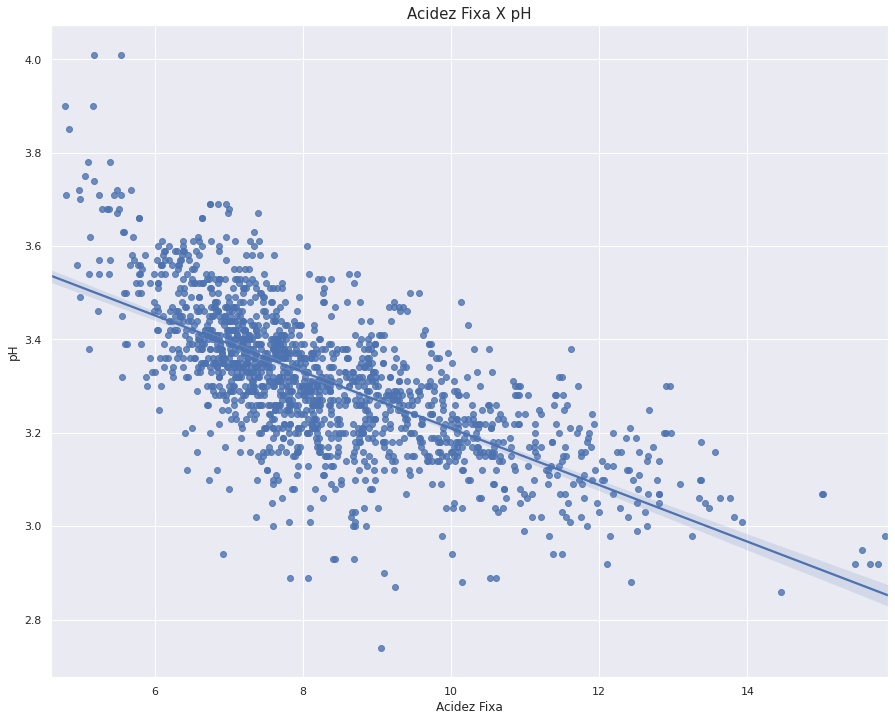

In [14]:
fig = plt.figure(figsize =(15, 12))
sns.set(color_codes=True)
sns.regplot(x='acidez_fixa', y='pH', data=df, x_jitter=0.2)
plt.xlabel("Acidez Fixa")
plt.ylabel("pH")
plt.title("Acidez Fixa X pH", fontsize=15)
plt.show()

Podemos concluir  que Existe uma correlação negativa. Quanto menor o "acidez_fixa, menor é o "pH".

**7) Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de
Pearson entre as variáveis "quality" e "alcohol":**

In [15]:
corr = df[['qualidade', 'alcool']].corr()

display(corr)

,qualidade,alcool
qualidade,1.000000,0.476166
alcool,0.476166,1.000000


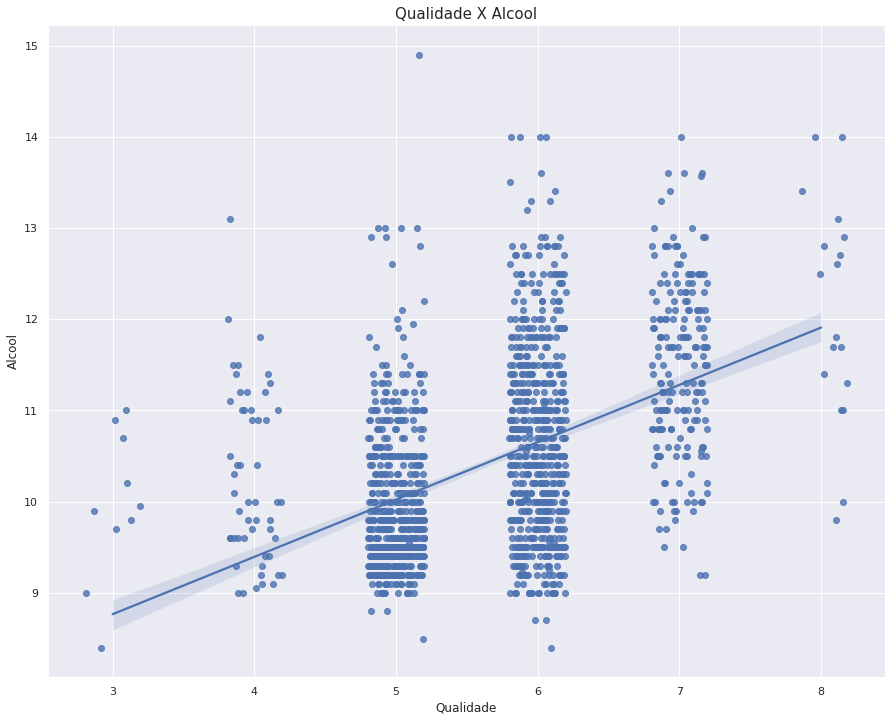

In [16]:
fig = plt.figure(figsize =(15, 12))
sns.set(color_codes=True)
sns.regplot(x='qualidade', y='alcool', data=df, x_jitter=0.2)
plt.xlabel("Qualidade")
plt.ylabel("Alcool")
plt.title("Qualidade X Alcool", fontsize=15)
plt.show()

Podemos concluir que a correlação  Quanto maior o teor alcoolico (alcohol), maior é a qualidade do vinho (quality).

**8) Quantas instâncias existem para a qualidade do vinho igual a 5?**

In [17]:
result = df[df['qualidade'] == 5]['qualidade'].value_counts()
result

5    681
Name: qualidade, dtype: int64

In [18]:
result = df[df['qualidade'] ==5]
result

,acidez_fixa,acidez_volatil,acido_citrico,acucar,cloreto,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,pH,sulfato,alcool,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


Temos 681 vinhos com qualidade 5 

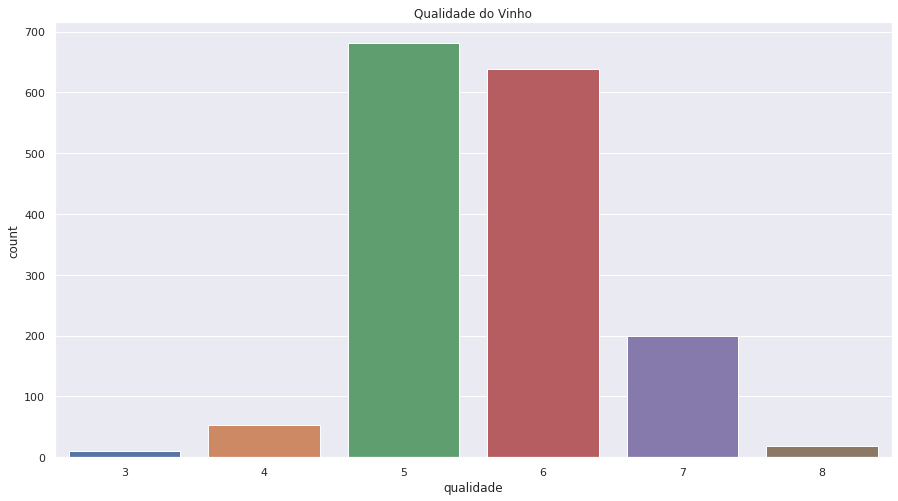

In [31]:
fig = plt.figure(figsize =(15, 8))
plt.title("Qualidade do Vinho")
sns.countplot(x="qualidade", data=df)
plt.show()

Na variável Qualidade podemos observar que a pontuação mínima é 3.0 e a máxima é 8.0. O que indica que nenhuma entrada recebeu o valor máximo 10.0 

**9) Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?**

In [19]:
df_normalizado = df.drop(columns='qualidade')
scaler = MinMaxScaler()
df_normalizado = scaler.fit_transform(df_normalizado)

In [20]:
df_normalizado

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [21]:
colunas = list(df.columns)
colunas.remove('qualidade')
df_normalizado = pd.DataFrame(data=df_normalizado, columns=colunas)
df_normalizado['acidez_fixa'].min()

0.0

**10) Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?**

In [22]:
#selecionando os dados para a construção da previsão
X = df_normalizado
y= df.qualidade


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5645833333333333

**11) Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?**

In [25]:
#aplicando um modelo de classificação via árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)
arvore.score(X_test, y_test)

0.5958333333333333

**12) Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?**

In [26]:
randomica = RandomForestClassifier(max_depth=10, random_state=1)
randomica.fit (X_train, y_train)
randomica.score(X_test, y_test)

0.6791666666666667

**13) Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?**

In [27]:
svm = SVC(gamma= 'auto', kernel = 'rbf')
svm.fit (X_train, y_train)
svm.score(X_test, y_test)

0.5854166666666667

**14) Aplicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?**

In [28]:
mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6

**15) Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?**

In [37]:
df_copy = df 
df_copy['qualidade_copy'] = df['qualidade'] > 5

X = df_normalizado
y = df.qualidade_copy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

floresta_rand_bin = RandomForestClassifier(max_depth=10, random_state=1)
floresta_rand_bin.fit(X_train, y_train)
floresta_rand_bin.score(X_test, y_test)

0.8041666666666667

Através da distribuição  é possível verificar a presença de outliers. Eles são dados que são drasticamente diferente dos demais, um ponto fora da curva. Que quando não tratados pode inteferir nos resultados obtidos da análise.

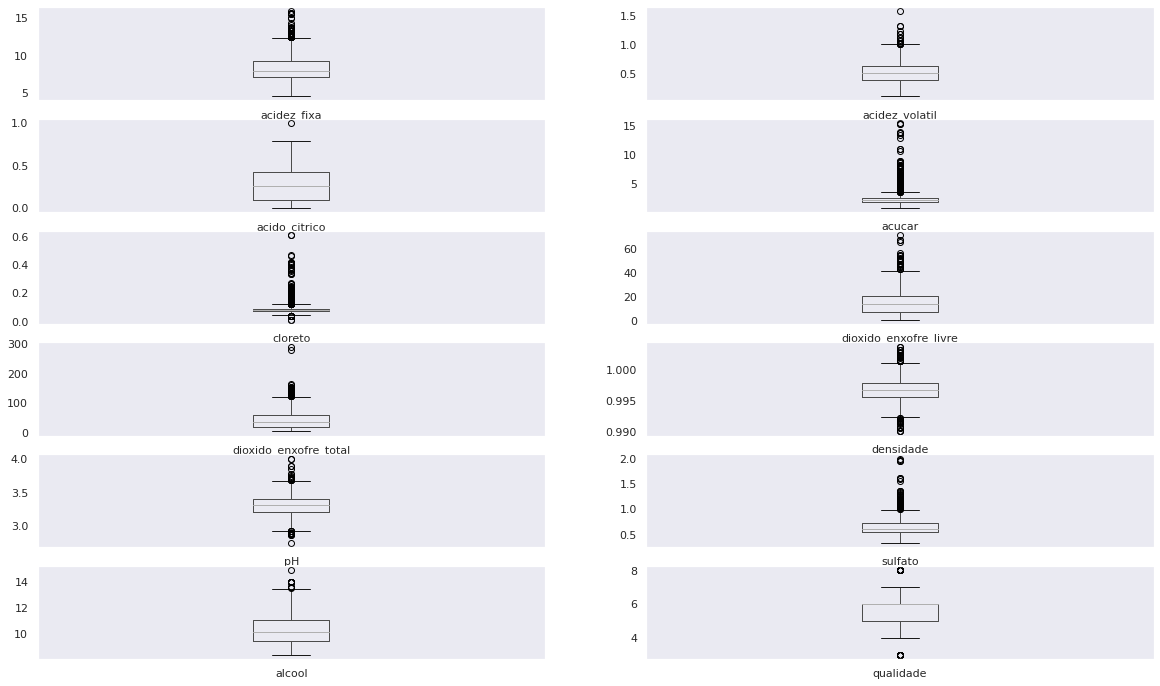

In [29]:
fig = plt.figure(figsize =(20, 12)) 
for i, col in enumerate (list(df.columns.values)):
  plt.subplot(6,2,i+1)
  df.boxplot(col)
  plt.grid()

Podemos observar que temos variáveis com possíveis outliers como: 


*   acidez_fixa
*   acidez_volatil
*   acucar 
*   cloreto 
*   dioxido_enxofre_livre
*   dioxido_enxofre_total
*   ph 
*   sulfato
*   alcool
*   qualidade



**Correlação de Dados**

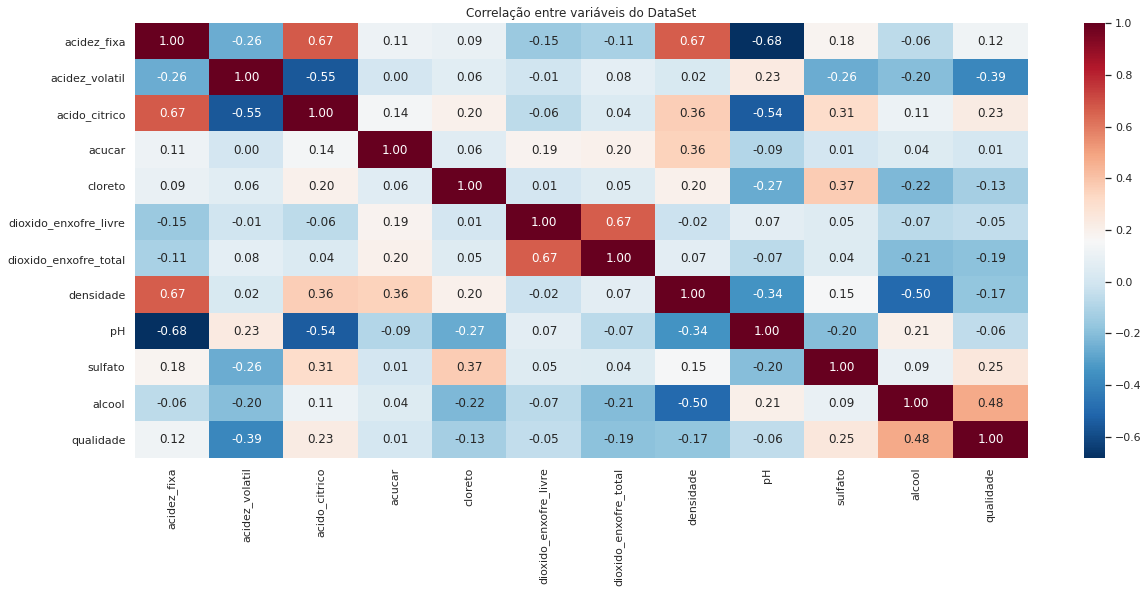

In [30]:
fig = plt.figure(figsize =(20, 8))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='RdBu_r')
plt.title('Correlação entre variáveis do DataSet')
plt.show()


Podemos concluir que: 


*   A acidez fixa tem uma correlação positiva com a densidade e com o ácido cítrico
*  A acidez fixa também apresenta  uma  correlação negativa com o pH.
*  O diáxido de enxofre livre tem uma correlação positiva com o diáxido de enxofre total e uma forte correlação negativa com a acidez volátil.
*  A densidade tem um correlação positiva com a acidez fixa e uma forte correlação negativa com o diáxido de enxofre livre.
* A qualidade tem uma correlação positiva com o álcool e uma forte correlação negativa com o diáxido de enxofre livre 
